<a href="https://colab.research.google.com/github/adarzhh/Improving-medical-care/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("c.csv")

In [ ]:
# Preprocessing: Handle missing values, encode categorical variables, etc.
data.dropna(subset=['DURATION OF STAY'], inplace=True)  # Drop rows where the target variable is missing
# Convert non-numeric values to NaN
numeric_cols = ['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE']

data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
# Replace NaNs with 0 for simplicity
data.fillna(0, inplace=True)

In [ ]:
# Select relevant features and target variable
X = data[['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE']]
y = data['DURATION OF STAY']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [ ]:
# Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [ ]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Get coefficients and intercept for Linear Regression
coefficients_linear = linear_model.coef_
intercept_linear = linear_model.intercept_

print('Linear Regression Coefficients:', coefficients_linear)
print('Linear Regression Intercept:', intercept_linear)

# Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


Linear Regression Coefficients: [ 0.03280405 -0.28912983  0.07286477  0.00081458  0.00269354  0.02719686
 -0.22396759]
Linear Regression Intercept: 5.745581875560866


In [ ]:
# Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Get feature importances for Decision Tree
feature_importance_tree = tree_model.feature_importances_

print('Decision Tree Feature Importances:', feature_importance_tree)


Decision Tree Feature Importances: [0.1905693  0.12419634 0.13024653 0.14501896 0.13875431 0.16178085
 0.1094337 ]


In [ ]:
# Evaluate Linear Regression Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print('Linear Regression - Root Mean Squared Error (RMSE):', rmse_linear)

Linear Regression - Root Mean Squared Error (RMSE): 4.787908057679451


In [ ]:
# Evaluate Decision Tree Model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print('Decision Tree - Root Mean Squared Error (RMSE):', rmse_tree)

Decision Tree - Root Mean Squared Error (RMSE): 6.863984681967589


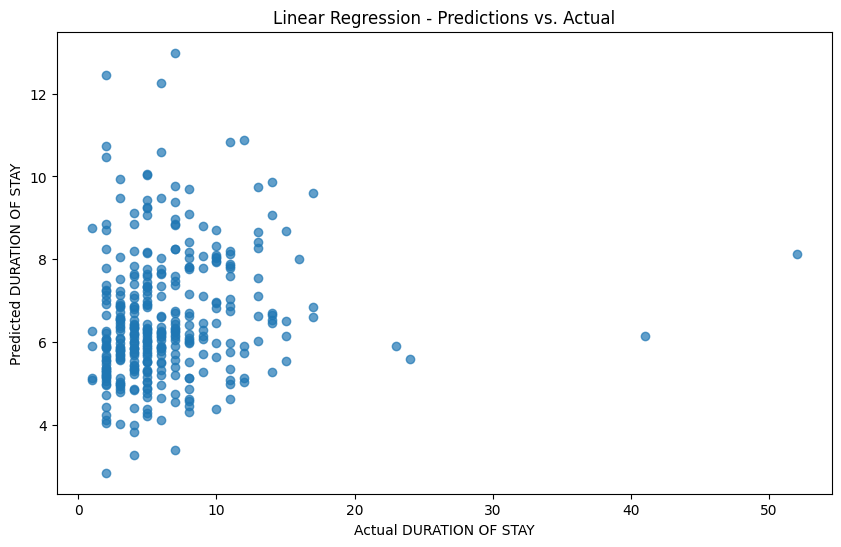

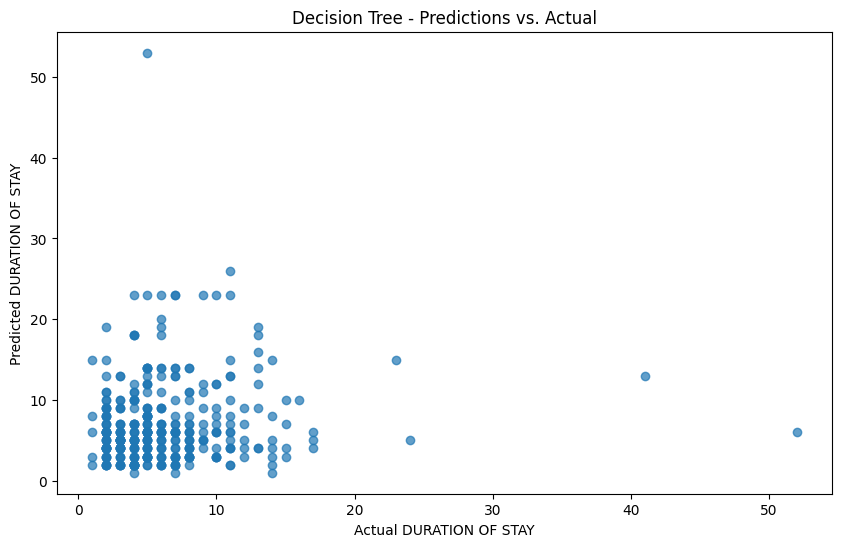

In [ ]:
# Scatter plot for Linear Regression predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7)
plt.xlabel('Actual DURATION OF STAY')
plt.ylabel('Predicted DURATION OF STAY')
plt.title('Linear Regression - Predictions vs. Actual')
plt.show()

# Scatter plot for Decision Tree predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.7)
plt.xlabel('Actual DURATION OF STAY')
plt.ylabel('Predicted DURATION OF STAY')
plt.title('Decision Tree - Predictions vs. Actual')
plt.show()


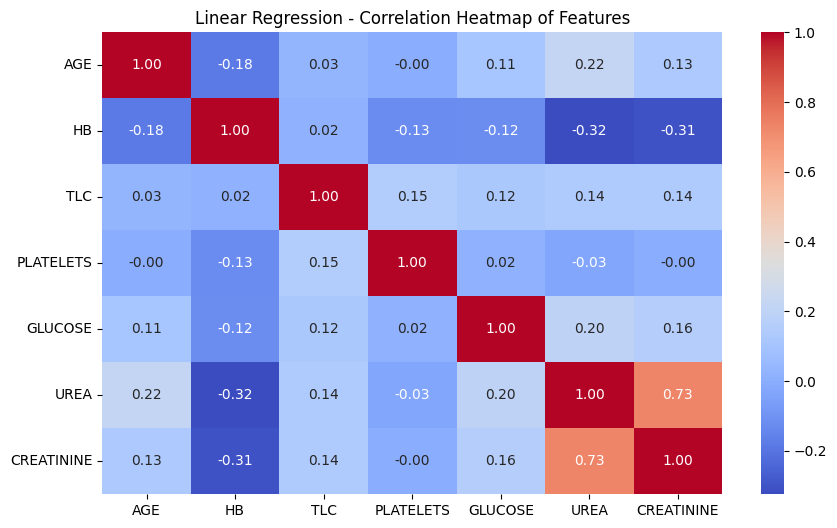

In [ ]:
# Create heatmap for Linear Regression
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix_linear = X_train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_linear, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear Regression - Correlation Heatmap of Features')
plt.show()

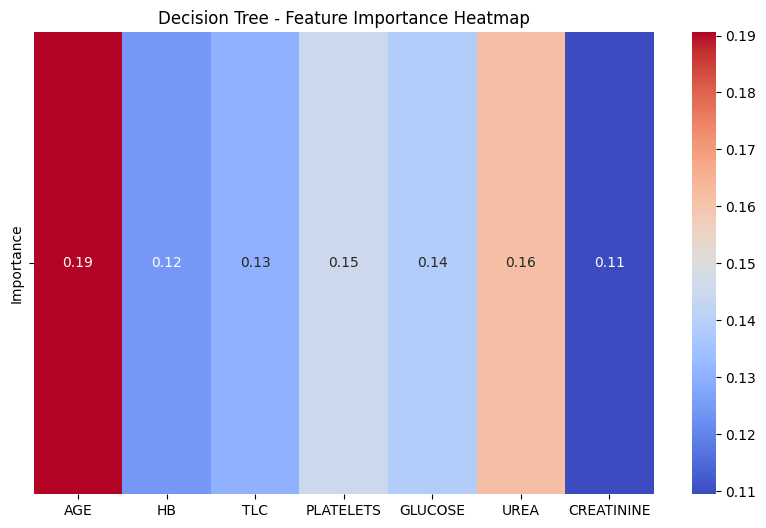

In [ ]:
# Create heatmap for Decision Tree
correlation_matrix_tree = pd.DataFrame(data=tree_model.feature_importances_, index=X_train.columns, columns=['Importance'])
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_tree.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Decision Tree - Feature Importance Heatmap')
plt.show()

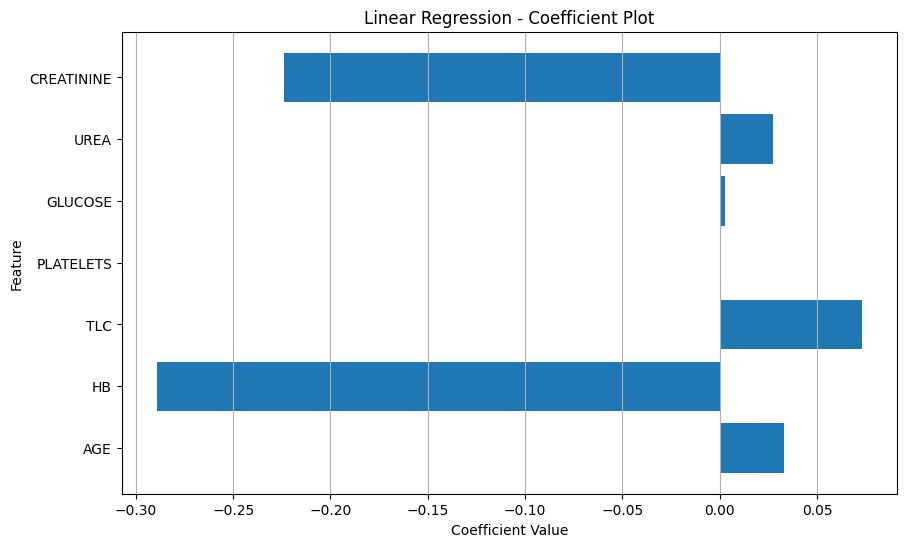

In [ ]:
# Create bar plot for Linear Regression coefficients
coefficients_linear = linear_model.coef_
feature_names_linear = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names_linear, coefficients_linear)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression - Coefficient Plot')
plt.grid(axis='x')
plt.show()

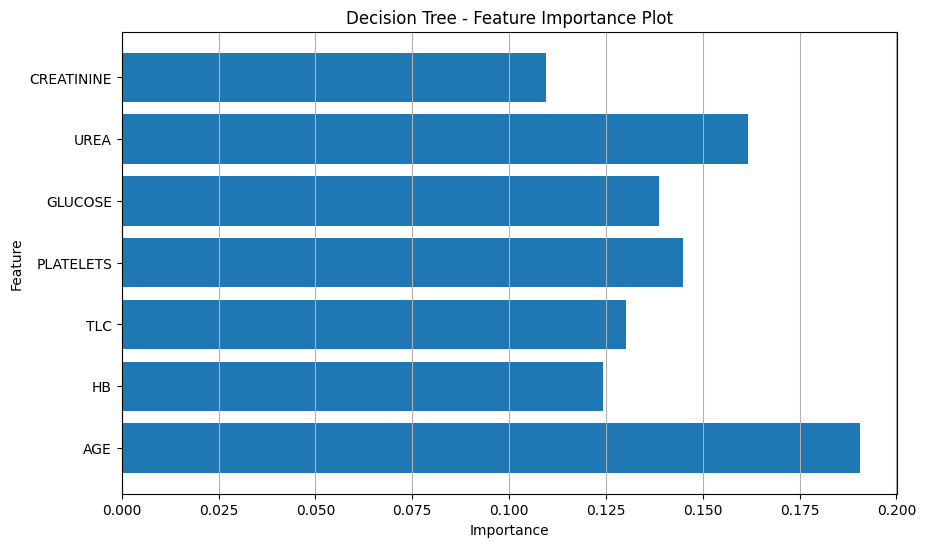

In [ ]:
# Create bar plot for Decision Tree feature importance
feature_importance_tree = tree_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance_tree)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree - Feature Importance Plot')
plt.grid(axis='x')
plt.show()


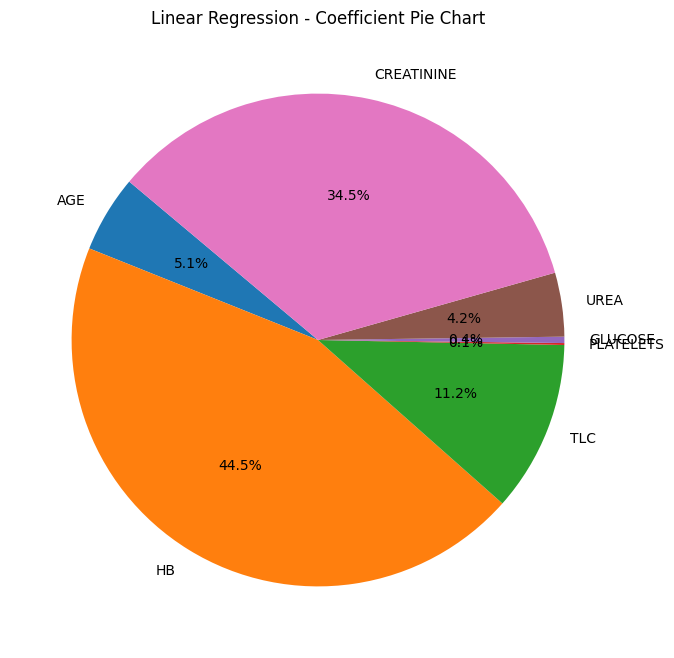

In [ ]:
# Create pie chart for Linear Regression coefficients
plt.figure(figsize=(8, 8))
plt.pie(np.abs(coefficients_linear), labels=feature_names_linear, autopct='%1.1f%%', startangle=140)
plt.title('Linear Regression - Coefficient Pie Chart')
plt.show()


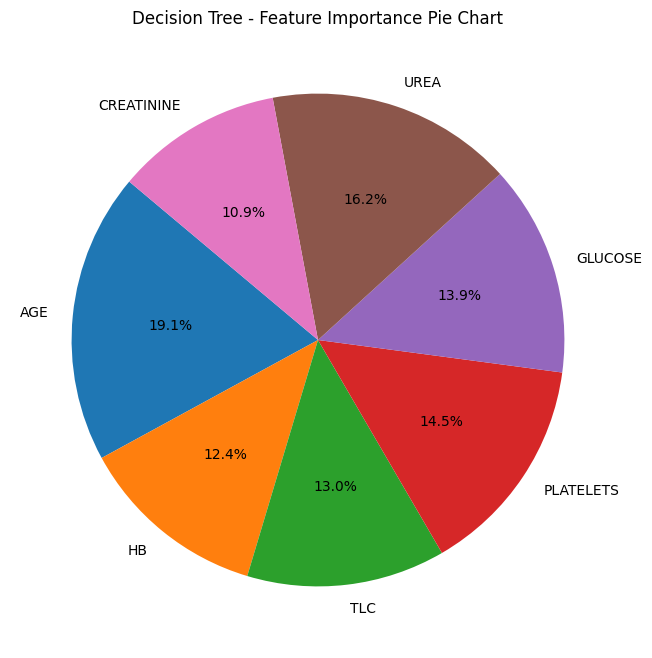

In [ ]:
# Create pie chart for Decision Tree feature importance
plt.figure(figsize=(8, 8))
plt.pie(feature_importance_tree, labels=X_train.columns, autopct='%1.1f%%', startangle=140)
plt.title('Decision Tree - Feature Importance Pie Chart')
plt.show()
